<a href="https://colab.research.google.com/github/thaohung13/AI_W4_24_2_2023/blob/main/AI_W4_24_2_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 28.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=7afb905bd9cf1c2bfa4806a659376e33c7de005463b8935ca366e20bde8ae7e4
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [ ]:
x = np.arange(30,81,1)
slow = fuzz.trimf(x,[30,30,50])
medium = fuzz.trimf(x,[30,50,70])
medium_fast = fuzz.trimf(x,[50,65,80])
full_speed = fuzz.trimf(x,[60,80,80])

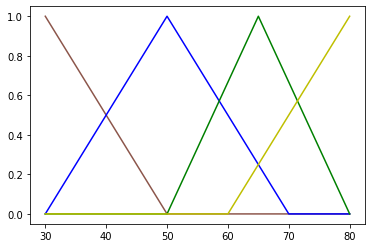

In [ ]:
plt.figure()
plt.plot(x,slow,'#8c564b',linewidth = 1.5, label = 'slow' )
plt.plot(x,medium,'b',linewidth = 1.5, label = 'medium' )
plt.plot(x,medium_fast,'g',linewidth = 1.5, label = 'medium_fast' )
plt.plot(x,full_speed,'y',linewidth = 1.5, label = 'full_speed' )


In [ ]:
from skfuzzy.membership.generatemf import trapmf
x = np.arange(30,81,1)
slow1 = fuzz.trapmf(x,[30,30,40,50])
medium1 = fuzz.trapmf(x,[30,50,50,70])
medium_fast1 = fuzz.trapmf(x,[50,60,65,80])
full_speed1 = fuzz.trapmf(x,[60,65,70,80])

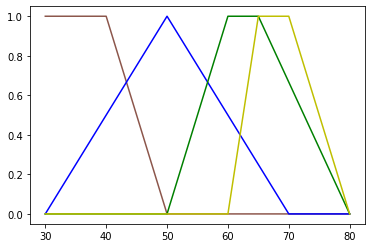

In [ ]:
plt.figure()
plt.plot(x,slow1,'#8c564b',linewidth = 1.5, label = 'slow1' )
plt.plot(x,medium1,'b',linewidth = 1.5, label = 'medium1' )
plt.plot(x,medium_fast1,'g',linewidth = 1.5, label = 'medium_fast1' )
plt.plot(x,full_speed1,'y',linewidth = 1.5, label = 'full_speed1' )

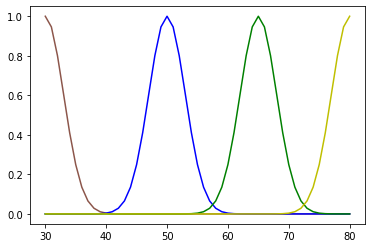

In [ ]:
x = np.arange(30,81,1)
slow2 = fuzz.gaussmf(x,30,3)
medium2 = fuzz.gaussmf(x,50,3)
medium_fast2 = fuzz.gaussmf(x,65,3)
full_speed2 = fuzz.gaussmf(x,80,3)
plt.figure()
plt.plot(x,slow2,'#8c564b',linewidth = 1.5, label = 'slow2' )
plt.plot(x,medium2,'b',linewidth = 1.5, label = 'medium2' )
plt.plot(x,medium_fast2,'g',linewidth = 1.5, label = 'medium_fast2' )
plt.plot(x,full_speed2,'y',linewidth = 1.5, label = 'full_speed2' )

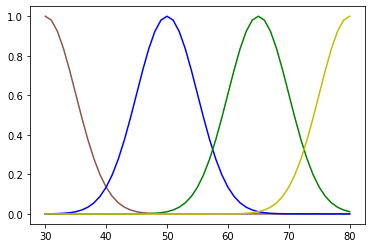

In [ ]:
x = np.arange(30,81,1)
slow3 = fuzz.gaussmf(x,30,5)
medium3 = fuzz.gaussmf(x,50,5)
medium_fast3 = fuzz.gaussmf(x,65,5)
full_speed3 = fuzz.gaussmf(x,80,5)
plt.figure()
plt.plot(x,slow3,'#8c564b',linewidth = 1.5, label = 'slow3' )
plt.plot(x,medium3,'b',linewidth = 1.5, label = 'medium3' )
plt.plot(x,medium_fast3,'g',linewidth = 1.5, label = 'medium_fast3' )
plt.plot(x,full_speed3,'y',linewidth = 1.5, label = 'full_speed3' )

In [ ]:
#chương trình điều khiển nồi cơm điện
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip  = ctrl.Consequent(np.arange(10,31,10),'tip')

food ['poor'] = fuzz.trimf(food.universe,[0,0,5])
food ['average'] = fuzz.trimf(food.universe,[0,5,10])
food ['good'] = fuzz.trimf(food.universe,[5,10,10])

service ['poor'] = fuzz.trimf(service.universe,[0,0,5])
service ['average'] = fuzz.trimf(service.universe,[0,5,10])
service ['good'] = fuzz.trimf(service.universe,[5,10,10])

tip ['Less'] = fuzz.trimf(tip.universe,[10,10,20])
tip ['Normal']= fuzz.trimf(tip.universe,[10,20,30])
tip['Much']= fuzz.trimf(tip.universe,[20,30,30])

#food.view()
#food['poor'].view()
#service.view()
#tip.view()

rule1 = ctrl.Rule(food['poor']&service['poor'],tip['Less'])
rule2 = ctrl.Rule(food['poor']&service['average'],tip['Less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['Normal'])
rule4 = ctrl.Rule(food['average']&service['poor'],tip['Less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['Normal'])
rule6 = ctrl.Rule(food['average']&service['good'],tip['Normal'])
rule7 = ctrl.Rule(food['good']&service['poor'],tip['Less'])
rule8 = ctrl.Rule(food['good']&service['average'],tip['Much'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['Much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)


SyntaxError: ignored

16.727272727272723


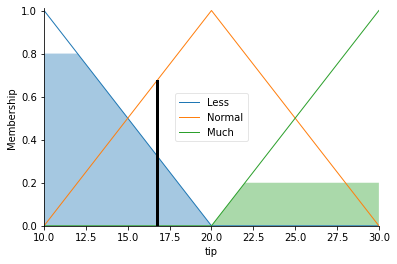

In [ ]:
tipping.input['food'] = 10
tipping.input['service'] = 1
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)


40.8028798760738


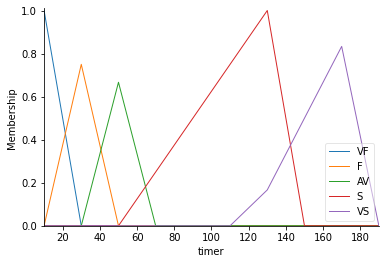

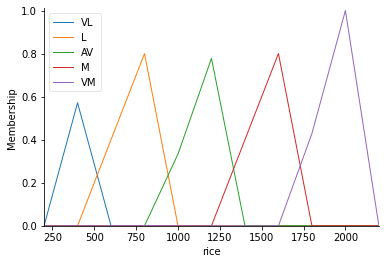

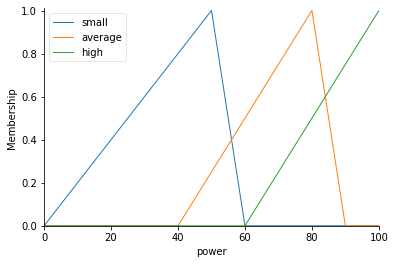

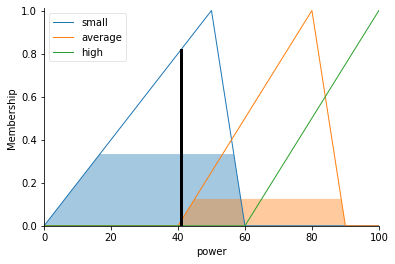

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
timer = ctrl.Antecedent(np.arange(10,200,20),'timer')
rice = ctrl.Antecedent(np.arange(200,2201,200),'rice')
power  = ctrl.Consequent(np.arange(0,110,10),'power')

timer ['VF'] = fuzz.trimf(timer.universe,[10,10,20])
timer ['F'] = fuzz.trimf(timer.universe,[15,35,35])
timer ['AV'] = fuzz.trimf(timer.universe,[30,60,60])
timer ['S'] = fuzz.trimf(timer.universe,[50,130,130])
timer ['VS'] = fuzz.trimf(timer.universe,[120,180,180])

rice ['VL'] = fuzz.trimf(rice.universe,[200,550,550])
rice ['L'] = fuzz.trimf(rice.universe,[400,900,900])
rice ['AV'] = fuzz.trimf(rice.universe,[850,1300,1300])
rice ['M'] = fuzz.trimf(rice.universe,[1200,1700,1700])
rice ['VM'] = fuzz.trimf(rice.universe,[1650,2000,2000])

power ['small'] = fuzz.trimf(power.universe,[0,50,50])
power ['average']= fuzz.trimf(power.universe,[40,80,80])
power ['high']= fuzz.trimf(power.universe,[60,100,100])

rule1 = ctrl.Rule(timer['VF']&rice['VL'],power['average'])
rule2 = ctrl.Rule(timer['VF']&rice['L'],power['average'])
rule3 = ctrl.Rule(timer['VF']&rice['AV'],power['high'])
rule4 = ctrl.Rule(timer['VF']&rice['M'],power['high'])
rule5 = ctrl.Rule(timer['VF']&rice['VM'],power['high'])
rule6 = ctrl.Rule(timer['F']&rice['VL'],power['average'])
rule7 = ctrl.Rule(timer['F']&rice['L'],power['average'])
rule8 = ctrl.Rule(timer['F']&rice['AV'],power['average'])
rule9 = ctrl.Rule(timer['F']&rice['M'],power['high'])
rule10 = ctrl.Rule(timer['F']&rice['VM'],power['high'])
rule11 = ctrl.Rule(timer['AV']&rice['VL'],power['small'])
rule12 = ctrl.Rule(timer['AV']&rice['L'],power['small'])
rule13 = ctrl.Rule(timer['AV']&rice['AV'],power['small'])
rule14 = ctrl.Rule(timer['AV']&rice['M'],power['high'])
rule15 = ctrl.Rule(timer['AV']&rice['VM'],power['high'])
rule16 = ctrl.Rule(timer['S']&rice['VL'],power['average'])
rule17 = ctrl.Rule(timer['S']&rice['L'],power['average'])
rule18 = ctrl.Rule(timer['S']&rice['AV'],power['average'])
rule19 = ctrl.Rule(timer['S']&rice['M'],power['high'])
rule20 = ctrl.Rule(timer['S']&rice['VM'],power['high'])
rule21 = ctrl.Rule(timer['VS']&rice['VL'],power['average'])
rule22 = ctrl.Rule(timer['VS']&rice['L'],power['average'])
rule23 = ctrl.Rule(timer['VS']&rice['AV'],power['high'])
rule24 = ctrl.Rule(timer['VS']&rice['M'],power['high'])
rule25 = ctrl.Rule(timer['VS']&rice['VM'],power['high'])

powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['timer'] = 60
powering.input['rice'] = 450
timer.view()
rice.view()
power.view()
powering.compute()
print(powering.output['power'])
power.view(sim = powering)

